In [1]:
import json

with open('/home/danis/Projects/AlphaCaption/AutoConceptBottleneck/autoconcept/outputs/2023-05-02/04-51-56/results.json') as f:
    results = json.load(f)

top_k = int(results["top_k"])
results = results["results"]

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(3, top_k)
    fig.set_size_inches(10, 4)
    labels = ["lrg", "mdm", "sml"]
    for i, ax in enumerate(axes.flatten()):
        label = labels[i // top_k]
        image = plt.imread(features[label][i % top_k][0])
        label = float(features[label][i % top_k][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none') 
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    if pair["feature"]:
        print("\nTop-n images with largest absolute values of logits:")
        plot_instances(pair["feature"])
    print(120 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. shape: 0.1638
	2. locate: 0.1466
	3. form: 0.1369
	4. figure: 0.1235
	5. up: 0.1149
	6. bottom: 0.1104
	7. the: 0.0956
	8. in: 0.0924
	9. position: 0.0881
	10. left: 0.0874
	11. blank: 0.0860
	12. unrotate: 0.0850
	13. right: 0.0794
	14. is: 0.0756
	15. color: 0.0738
	16. shade: 0.0637
	17. picture: 0.0566
	18. transparent: 0.0541
	19. fix: 0.0533
	20. turn: 0.0513
	21. red: 0.0461
	22. image: 0.0316
	23. solid: 0.0298
	24. scarlet: 0.0268
	25. crimson: 0.0254
	26. corner: 0.0249
	27. olive: 0.0237
	28. lime: 0.0220
	29. angle: 0.0217
	30. green: 0.0190
	31. rotate: 0.0172
	32. cyan: 0.0141
	33. white: 0.0138
	34. static: 0.0135
	35. azure: 0.0108
	36. photo: 0.0102
	37. circular: 0.0091
	38. triangular: 0.0070
	39. blue: 0.0058
	40. unturn: 0.0056
	41. that: 0.0028
	42. have: 0.0027
	43. canvas: 0.0027
	44. outline: 0.0024
	45. quadratic: 0.0002
	46. four: 0.0001
	47. with: 0.0000
	48. round: 0.0000
	49. this: 0.0000
	50. no

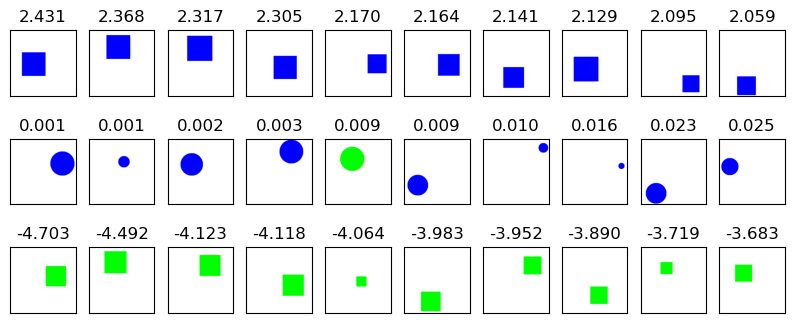

------------------------------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. this: 0.2508
	2. background: 0.2467
	3. that: 0.2346
	4. canvas: 0.1891
	5. solid: 0.1829
	6. photo: 0.1722
	7. shade: 0.1439
	8. unturn: 0.1372
	9. the: 0.1254
	10. red: 0.1128
	11. three: 0.1111
	12. image: 0.1036
	13. transparent: 0.1005
	14. round: 0.0982
	15. scarlet: 0.0853
	16. crimson: 0.0846
	17. no: 0.0835
	18. right: 0.0757
	19. outline: 0.0723
	20. rotate: 0.0702
	21. static: 0.0701
	22. circular: 0.0680
	23. with: 0.0656
	24. green: 0.0643
	25. lime: 0.0611
	26. white: 0.0594
	27. picture: 0.0553
	28. left: 0.0523
	29. bottom: 0.0462
	30. turn: 0.0374
	31. blank: 0.0359
	32. is: 0.0311
	33. cyan: 0.0209
	34. angle: 0.0195
	35. olive: 0.0158
	36. locate: 0.0154
	37. quadratic: 0.0153
	38. position: 0.0138
	39. in: 0.0109
	40. have: 0.0098
	41. unrotate: 0.0081
	42. shape: 0.0076
	43. corner: 0.0

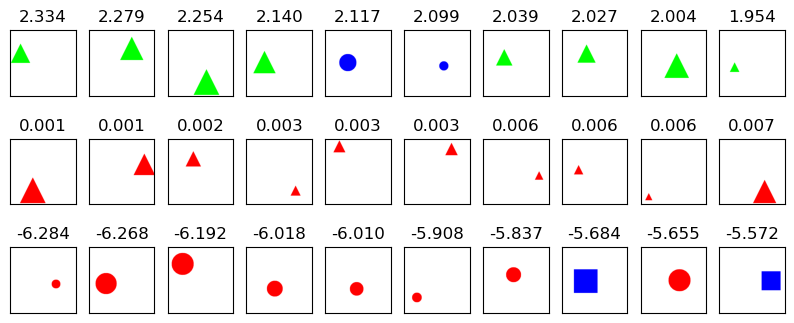

------------------------------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. blue: 0.3027
	2. cyan: 0.2382
	3. azure: 0.2026
	4. have: 0.1157
	5. lime: 0.1018
	6. quadratic: 0.1002
	7. green: 0.0737
	8. olive: 0.0597
	9. turn: 0.0462
	10. four: 0.0458
	11. color: 0.0314
	12. up: 0.0243
	13. in: 0.0162
	14. with: 0.0150
	15. unrotate: 0.0150
	16. right: 0.0149
	17. blank: 0.0146
	18. shape: 0.0136
	19. white: 0.0128
	20. figure: 0.0097
	21. bottom: 0.0092
	22. form: 0.0085
	23. no: 0.0062
	24. outline: 0.0056
	25. picture: 0.0051
	26. locate: 0.0047
	27. rotate: 0.0044
	28. static: 0.0033
	29. canvas: 0.0032
	30. fix: 0.0016
	31. unturn: 0.0000
	32. crimson: 0.0000
	33. circular: 0.0000
	34. triangular: 0.0000
	35. red: 0.0000
	36. scarlet: 0.0000
	37. is: 0.0000
	38. position: 0.0000
	39. corner: 0.0000
	40. <pad>: 0.0000
	41. shade: 0.0000
	42. round: 0.0000
	43. three: 0.0000
	44.

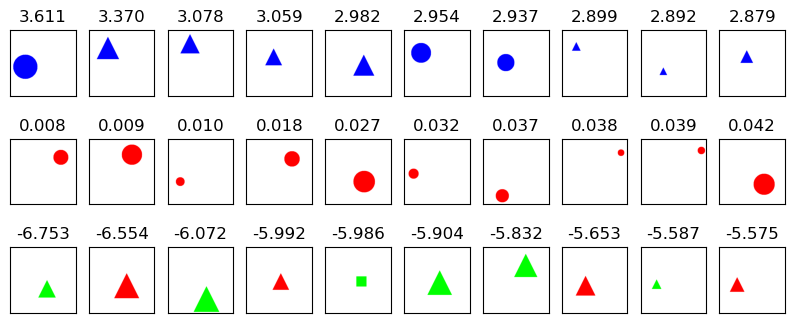

------------------------------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. four: 0.2269
	2. quadratic: 0.2026
	3. azure: 0.1090
	4. blue: 0.0636
	5. triangular: 0.0628
	6. have: 0.0587
	7. with: 0.0578
	8. angle: 0.0520
	9. static: 0.0489
	10. green: 0.0486
	11. rotate: 0.0472
	12. cyan: 0.0433
	13. white: 0.0403
	14. lime: 0.0393
	15. no: 0.0381
	16. outline: 0.0362
	17. scarlet: 0.0293
	18. turn: 0.0292
	19. circular: 0.0284
	20. crimson: 0.0269
	21. unrotate: 0.0266
	22. in: 0.0255
	23. canvas: 0.0241
	24. up: 0.0229
	25. corner: 0.0196
	26. olive: 0.0178
	27. picture: 0.0147
	28. bottom: 0.0106
	29. color: 0.0076
	30. unturn: 0.0066
	31. right: 0.0065
	32. position: 0.0061
	33. blank: 0.0052
	34. transparent: 0.0043
	35. fix: 0.0041
	36. locate: 0.0022
	37. figure: 0.0020
	38. left: 0.0016
	39. form: 0.0006
	40. is: 0.0003
	41. photo: 0.0000
	42. round: 0.0000
	43. red: 0.0000

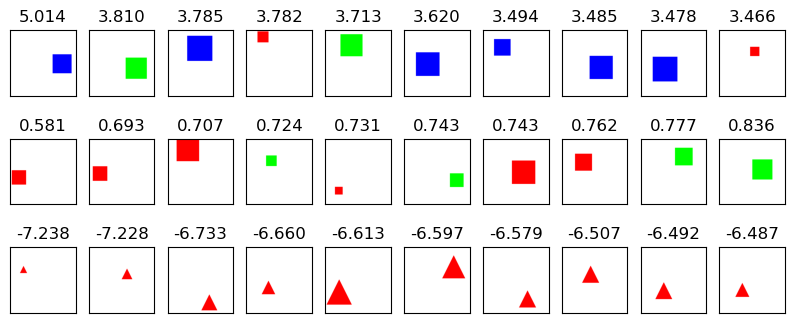

------------------------------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. three: 0.2884
	2. have: 0.1733
	3. quadratic: 0.1558
	4. with: 0.1506
	5. round: 0.1329
	6. circular: 0.1256
	7. scarlet: 0.1067
	8. rotate: 0.0929
	9. image: 0.0811
	10. olive: 0.0799
	11. is: 0.0761
	12. four: 0.0607
	13. turn: 0.0576
	14. photo: 0.0526
	15. position: 0.0523
	16. green: 0.0474
	17. transparent: 0.0472
	18. picture: 0.0455
	19. in: 0.0419
	20. no: 0.0383
	21. lime: 0.0340
	22. shade: 0.0294
	23. outline: 0.0237
	24. left: 0.0214
	25. blank: 0.0173
	26. angle: 0.0164
	27. crimson: 0.0145
	28. canvas: 0.0144
	29. unrotate: 0.0118
	30. white: 0.0118
	31. static: 0.0061
	32. the: 0.0054
	33. fix: 0.0048
	34. right: 0.0044
	35. bottom: 0.0031
	36. background: 0.0023
	37. solid: 0.0019
	38. up: 0.0016
	39. locate: 0.0013
	40. cyan: 0.0007
	41. red: 0.0007
	42. form: 0.0001
	43. unturn: 0.0000
	4

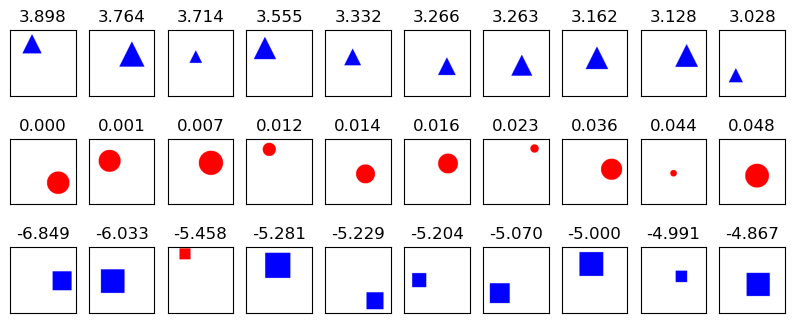

------------------------------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. outline: 0.1761
	2. corner: 0.1616
	3. no: 0.1470
	4. unturn: 0.1313
	5. white: 0.1308
	6. static: 0.1271
	7. angle: 0.1240
	8. triangular: 0.1193
	9. circular: 0.1144
	10. olive: 0.1051
	11. color: 0.1029
	12. crimson: 0.1027
	13. round: 0.0952
	14. right: 0.0903
	15. with: 0.0895
	16. azure: 0.0889
	17. red: 0.0882
	18. green: 0.0847
	19. four: 0.0844
	20. lime: 0.0829
	21. blue: 0.0781
	22. cyan: 0.0693
	23. picture: 0.0608
	24. rotate: 0.0597
	25. image: 0.0553
	26. canvas: 0.0540
	27. scarlet: 0.0535
	28. bottom: 0.0533
	29. locate: 0.0511
	30. turn: 0.0465
	31. is: 0.0446
	32. the: 0.0424
	33. blank: 0.0414
	34. left: 0.0411
	35. fix: 0.0394
	36. solid: 0.0391
	37. that: 0.0340
	38. photo: 0.0303
	39. transparent: 0.0207
	40. position: 0.0205
	41. shade: 0.0186
	42. in: 0.0184
	43. up: 0.0168
	44. bac

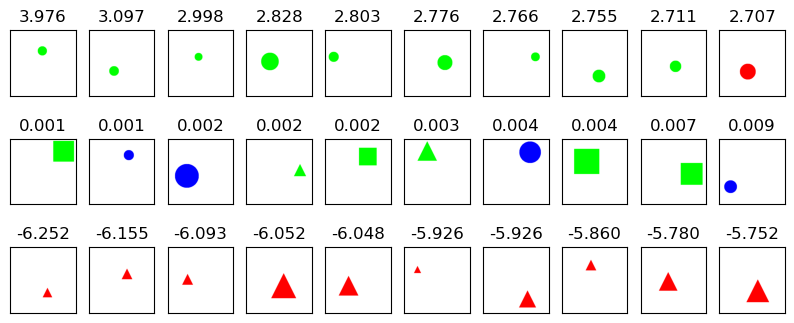

------------------------------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. fix: 0.1873
	2. triangular: 0.1691
	3. angle: 0.1619
	4. corner: 0.1575
	5. position: 0.1354
	6. is: 0.1203
	7. left: 0.1196
	8. unrotate: 0.1039
	9. rotate: 0.1033
	10. in: 0.0978
	11. static: 0.0978
	12. picture: 0.0859
	13. turn: 0.0787
	14. image: 0.0712
	15. color: 0.0690
	16. white: 0.0678
	17. scarlet: 0.0654
	18. red: 0.0654
	19. crimson: 0.0647
	20. figure: 0.0607
	21. transparent: 0.0582
	22. blank: 0.0544
	23. locate: 0.0525
	24. form: 0.0518
	25. bottom: 0.0487
	26. four: 0.0482
	27. circular: 0.0458
	28. right: 0.0434
	29. outline: 0.0428
	30. up: 0.0424
	31. unturn: 0.0399
	32. shape: 0.0382
	33. the: 0.0371
	34. olive: 0.0353
	35. solid: 0.0329
	36. photo: 0.0283
	37. round: 0.0262
	38. canvas: 0.0154
	39. quadratic: 0.0139
	40. blue: 0.0126
	41. shade: 0.0040
	42. no: 0.0025
	43. azure: 0.00

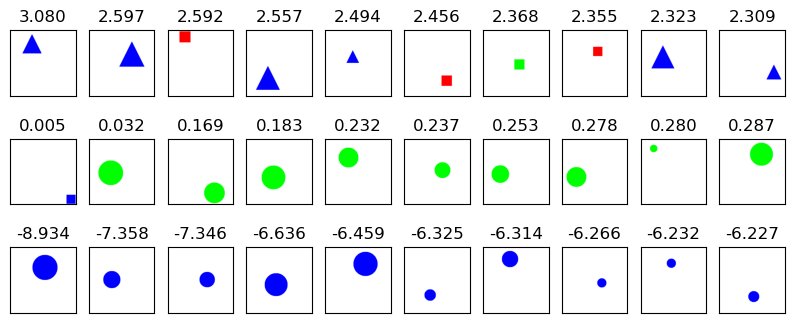

------------------------------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. azure: 0.2371
	2. cyan: 0.2343
	3. blue: 0.2254
	4. olive: 0.2025
	5. green: 0.1697
	6. lime: 0.1518
	7. quadratic: 0.1229
	8. with: 0.1051
	9. have: 0.0994
	10. no: 0.0958
	11. outline: 0.0842
	12. four: 0.0756
	13. crimson: 0.0487
	14. color: 0.0232
	15. canvas: 0.0220
	16. turn: 0.0193
	17. white: 0.0104
	18. rotate: 0.0092
	19. scarlet: 0.0082
	20. static: 0.0054
	21. locate: 0.0048
	22. three: 0.0037
	23. right: 0.0033
	24. bottom: 0.0029
	25. up: 0.0027
	26. unturn: 0.0024
	27. picture: 0.0010
	28. in: 0.0009
	29. angle: 0.0006
	30. is: 0.0001
	31. triangular: 0.0000
	32. circular: 0.0000
	33. red: 0.0000
	34. corner: 0.0000
	35. shade: 0.0000
	36. background: 0.0000
	37. unrotate: 0.0000
	38. transparent: 0.0000
	39. <pad>: 0.0000
	40. the: 0.0000
	41. figure: 0.0000
	42. position: 0.0000
	43. fix: 0

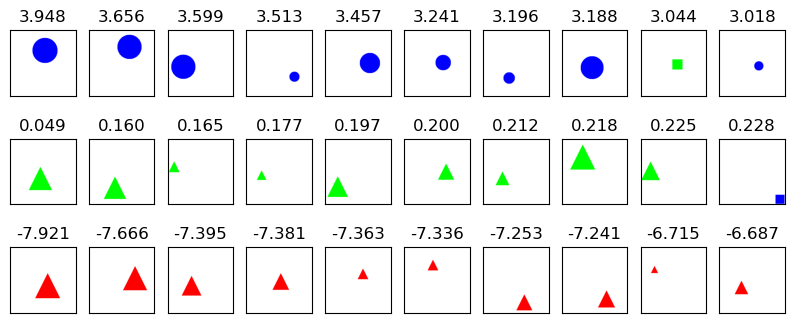

------------------------------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. round: 0.1304
	2. circular: 0.1187
	3. no: 0.0959
	4. photo: 0.0373
	5. image: 0.0220
	6. with: 0.0211
	7. crimson: 0.0201
	8. four: 0.0162
	9. red: 0.0143
	10. picture: 0.0118
	11. shade: 0.0097
	12. three: 0.0084
	13. transparent: 0.0072
	14. left: 0.0058
	15. solid: 0.0054
	16. scarlet: 0.0048
	17. rotate: 0.0043
	18. blank: 0.0037
	19. fix: 0.0037
	20. static: 0.0034
	21. unturn: 0.0025
	22. canvas: 0.0024
	23. locate: 0.0023
	24. lime: 0.0023
	25. right: 0.0015
	26. bottom: 0.0012
	27. outline: 0.0007
	28. cyan: 0.0006
	29. position: 0.0006
	30. up: 0.0005
	31. turn: 0.0005
	32. white: 0.0005
	33. the: 0.0004
	34. background: 0.0003
	35. angle: 0.0002
	36. unrotate: 0.0000
	37. color: 0.0000
	38. olive: 0.0000
	39. triangular: 0.0000
	40. quadratic: 0.0000
	41. corner: 0.0000
	42. blue: 0.0000
	43. gre

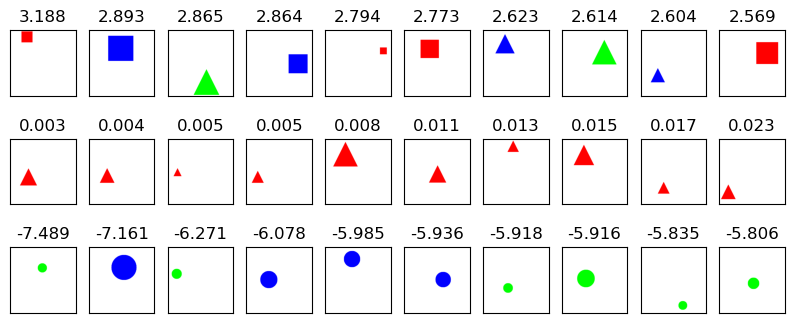

------------------------------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. have: 0.1836
	2. shape: 0.1423
	3. form: 0.1396
	4. up: 0.1263
	5. in: 0.1051
	6. quadratic: 0.0942
	7. turn: 0.0903
	8. figure: 0.0871
	9. unrotate: 0.0830
	10. position: 0.0818
	11. bottom: 0.0671
	12. is: 0.0666
	13. locate: 0.0626
	14. lime: 0.0589
	15. shade: 0.0500
	16. green: 0.0470
	17. right: 0.0466
	18. transparent: 0.0405
	19. blank: 0.0404
	20. olive: 0.0404
	21. picture: 0.0382
	22. the: 0.0361
	23. scarlet: 0.0326
	24. cyan: 0.0270
	25. left: 0.0264
	26. rotate: 0.0246
	27. image: 0.0177
	28. with: 0.0171
	29. azure: 0.0167
	30. crimson: 0.0129
	31. fix: 0.0109
	32. blue: 0.0094
	33. photo: 0.0072
	34. color: 0.0070
	35. red: 0.0050
	36. static: 0.0042
	37. four: 0.0036
	38. solid: 0.0005
	39. white: 0.0001
	40. canvas: 0.0001
	41. unturn: 0.0000
	42. circular: 0.0000
	43. triangular: 0.0000


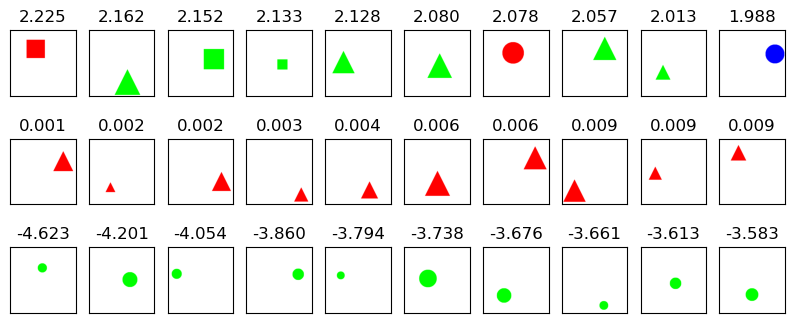

------------------------------------------------------------------------------------------------------------------------
Concept #11

Top-k tokens w.r.t. average attention score:
	1. figure: 0.1738
	2. color: 0.1555
	3. form: 0.1372
	4. blank: 0.1268
	5. up: 0.1254
	6. unrotate: 0.1059
	7. fix: 0.1033
	8. shape: 0.0867
	9. locate: 0.0848
	10. bottom: 0.0619
	11. four: 0.0618
	12. triangular: 0.0616
	13. white: 0.0561
	14. cyan: 0.0491
	15. azure: 0.0459
	16. angle: 0.0445
	17. blue: 0.0427
	18. in: 0.0405
	19. position: 0.0396
	20. picture: 0.0367
	21. left: 0.0319
	22. corner: 0.0293
	23. right: 0.0285
	24. transparent: 0.0277
	25. static: 0.0255
	26. crimson: 0.0243
	27. turn: 0.0237
	28. lime: 0.0180
	29. the: 0.0145
	30. green: 0.0130
	31. scarlet: 0.0124
	32. circular: 0.0114
	33. olive: 0.0106
	34. red: 0.0105
	35. rotate: 0.0081
	36. canvas: 0.0060
	37. unturn: 0.0059
	38. shade: 0.0056
	39. no: 0.0055
	40. is: 0.0029
	41. outline: 0.0005
	42. photo: 0.0000
	43. this: 0.0000
	44

IndexError: list index out of range

In [5]:
for i in range(51):
    visualize_concept(i)